In [1]:
import evaluate
import Utils
import network
import numpy as np
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [2]:
image_num = 5
model = Utils.load_model('D:/ZAVRSNI/Kodovi/trained_models/margin_is_0_2/trained_model.pth')
D = 50

In [3]:
# metoda vraća predikciju mape dispariteta
model.to('cpu').eval()
# dohvati slike
left = Utils.get_left_image(image_num)
right = Utils.get_right_image(image_num)
disp = Utils.get_disp_image(image_num)

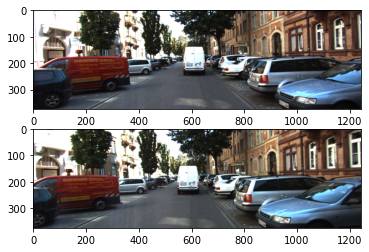

In [4]:
# slike pretvori u patcheve 3x3
plt.subplot(2,1,1)
plt.imshow(left)
plt.subplot(2,1,2)
plt.imshow(right)

In [5]:
ref_row = 200
ref_col = 350
true_disp = disp[ref_row, ref_col]
print(f"true disparity = {true_disp}")
pos_col = ref_col-true_disp
neg_col = 600
ref_patch = left[ref_row-1 : ref_row+2, ref_col-1 : ref_col+2]
pos_patch = right[ref_row-1 : ref_row+2, pos_col-1 : pos_col+2]
neg_patch = right[ref_row-1 : ref_row+2, neg_col-1 : neg_col+2]

true disparity = 38


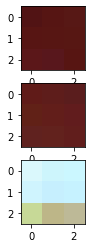

In [6]:
plt.subplot(3,1,1)
plt.imshow(ref_patch)
plt.subplot(3,1,2)
plt.imshow(pos_patch)
plt.subplot(3,1,3)
plt.imshow(neg_patch)

In [7]:
# pretvori slike za ulaz u model
ref_input = evaluate.transform_image_for_model(ref_patch)
pos_input = evaluate.transform_image_for_model(pos_patch)
neg_input = evaluate.transform_image_for_model(neg_patch)
# provuci slike kroz model i pretvori ih u prikladni ndarray
ref_output = evaluate.transform_model_output_to_ndarray(model(ref_input))
pos_output = evaluate.transform_model_output_to_ndarray(model(pos_input))
neg_output = evaluate.transform_model_output_to_ndarray(model(neg_input))

In [8]:
np.sum(ref_output * pos_output, axis=2)

array([[0.9924558 , 0.99779725, 0.9961909 ],
       [0.9952001 , 0.9982024 , 0.99697506],
       [0.9917442 , 0.9980305 , 0.9956179 ]], dtype=float32)

In [9]:
# ndarray[HxWxD]
#similarities_at_all_D_disparities = np.stack([evaluate.similarity_at_d(left_output, right_output, d) for d in range(D)], axis=2)
ref_pos_similarity_at_d_0 = evaluate.similarity_at_d(ref_output, pos_output, 0)
ref_neg_similarity_at_d_0 = evaluate.similarity_at_d(ref_output, neg_output, 0)

In [10]:
print("ref pos similarity:\n", ref_pos_similarity_at_d_0)
print("ref neg similarity:\n", ref_neg_similarity_at_d_0)

ref pos similarity:
 [[0.9924558  0.99779725 0.9961909 ]
 [0.9952001  0.9982024  0.99697506]
 [0.9917442  0.9980305  0.9956179 ]]
ref neg similarity:
 [[0.8863453  0.9644397  0.9462664 ]
 [0.93863547 0.97644764 0.96214676]
 [0.9230392  0.9845742  0.950805  ]]


In [ ]:
# ndarray[HxW]
predicted_disparity_map = np.argmin(similarity_at_d_0, axis=2)